In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
X = np.array([0, 1, 2, 3, 4, 5])
#X = np.array([0, 2, 1, 5, 10, 13])
Y = np.array([-18, -13, 0, 5, 3, 10])

In [3]:
# Calculamos las diferencias

Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y

for j in range(1,len(X)): # J es el orden de la diferencia
    for i in range(j,len(X)):
        Diff[i,j] = (Diff[i,j-1]-Diff[i-1,j-1])/(X[i]-X[i-j])
        
# Recordar que la derivada 
#van i i+1 primer
#i i+2 segunda
#i i+j para la j-esima
#haciendo cambio de variable
#k = i+j
#entonces
#k-j hasta k

In [4]:
print(np.round(Diff,2))

[[-18.     0.     0.     0.     0.     0.  ]
 [-13.     5.     0.     0.     0.     0.  ]
 [  0.    13.     4.     0.     0.     0.  ]
 [  5.     5.    -4.    -2.67   0.     0.  ]
 [  3.    -2.    -3.5    0.17   0.71   0.  ]
 [ 10.     7.     4.5    2.67   0.62  -0.02]]


In [5]:
x  = sym.Symbol('x')
print(Y[0])
poly = Y[0]

-18


In [6]:
for i in range(1,len(X)):
    factor = 1.0
    for j in range(i):
        factor *= (x-X[j])
    poly += factor*Diff[i,i]

In [7]:
#print(poly)
poly = poly.expand()
print(poly)

-0.0166666666666667*x**5 + 0.875*x**4 - 7.5*x**3 + 20.625*x**2 - 8.98333333333333*x - 18


In [8]:
# Pasamos a lo numérico
px = sym.lambdify(x,poly)

In [9]:
x1  = np.linspace(np.min(X),np.max(X),100)
y1 = px(x1)

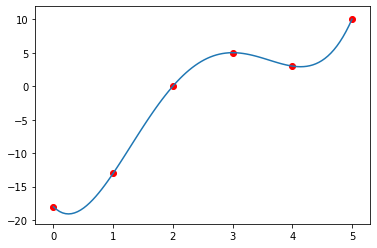

In [10]:
plt.plot(x1,y1)
plt.scatter(X,Y,color='r')